In [1]:
import tensorflow as tf
#TF v1.x
g = tf.Graph()
with g.as_default():
    a = tf.constant(1, name = 'a')
    b = tf.constant(2, name = 'b')
    c = tf.constant(3, name = 'c')
    z = 2*(a-b) + c

In [2]:
with tf.compat.v1.Session(graph=g) as sess:
    print(sess.run(z))


1


In [3]:
#TF v2
a = tf.constant(1, name = 'a')
b = tf.constant(2, name = 'b')
c = tf.constant(3, name = 'c')
z = 2*(a-b) + c
tf.print(z)

1


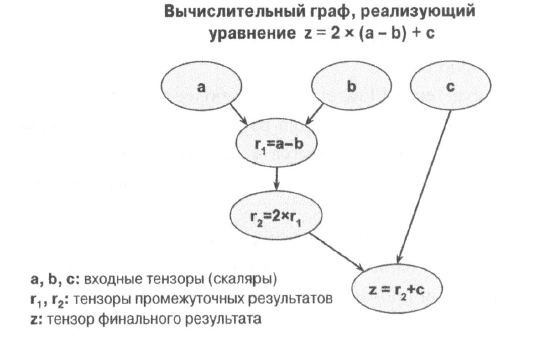

In [4]:
#TF v1.x передача данных в граф
g = tf.Graph()
with g.as_default():
    a = tf.compat.v1.placeholder(shape=None,
                                 dtype=tf.int32, name='tf_a')
    b = tf.compat.v1.placeholder(shape=None,
                                 dtype=tf.int32, name='tf_b')
    c = tf.compat.v1.placeholder(shape=None,
                                 dtype=tf.int32, name='tf_c')
    z = 2*(a-b) + c

with tf.compat.v1.Session(graph=g) as sess:
    feed_dict = {a:1, b:2, c:3}
    print(sess.run(z, feed_dict=feed_dict))

1


In [5]:
#TF v2
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print(compute_z(1, 2, 3))
tf.print(compute_z([1], [2], [3]))
tf.print(compute_z([[1]], [[2]], [[3]]))

1
[1]
[[1]]


In [6]:
@tf.function #после декорирования tf будет создавать статический граф на основе входных аргументов
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z
tf.print(compute_z(1, 2, 3))
tf.print(compute_z([1], [2], [3]))
tf.print(compute_z([[1]], [[2]], [[3]]))

1


[1]
[[1]]


In [7]:
@tf.function(input_signature=(tf.TensorSpec(shape=[None],
                                            dtype=tf.int32),
                              tf.TensorSpec(shape=[None],
                                            dtype=tf.int32),
                              tf.TensorSpec(shape=[None],
                                            dtype=tf.int32)))
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print(compute_z([1], [2], [3]))
tf.print(compute_z([1, 2], [2, 4], [3, 6]))

[1]
[1 2]


In [8]:
#tf.print(compute_z(1, 2, 3))

In [9]:
a = tf.Variable(initial_value=3.14, name='var_a')
print(a)

<tf.Variable 'var_a:0' shape=() dtype=float32, numpy=3.14>


In [10]:
b = tf.Variable(initial_value=[1, 2, 3], name='var_b')
print(b)

<tf.Variable 'var_b:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3])>


In [11]:
c = tf.Variable(initial_value=[True, False], name='var_c')
print(c)

<tf.Variable 'var_c:0' shape=(2,) dtype=bool, numpy=array([ True, False])>


In [12]:
d = tf.Variable(initial_value=['abc'], dtype=tf.string)
print(d)

<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'abc'], dtype=object)>


In [13]:
w = tf.Variable([1, 2, 3], trainable=False)
print(w.trainable)

False


In [14]:
print(w.assign([3, 1, 4], read_value=True))


<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([3, 1, 4])>


In [15]:
w.assign_add([2, -1, 2], read_value=False)
print(w.value())

tf.Tensor([5 0 6], shape=(3,), dtype=int32)


In [16]:
tf.random.set_seed(1)
init = tf.keras.initializers.GlorotNormal()
tf.print(init(shape=(3,)))

[0.849565268 -0.699246943 0.302020669]


In [17]:
v = tf.Variable(init(shape=(2,3)))
tf.print(v)

[[0.930652142 -0.765986621 0.330847055]
 [-0.2523835 -0.0859969631 0.642668426]]


c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Инициализация Глоро - более эффективная начальная инициализация весов за счет уравновешения дисперсию градиентов между слоями

In [18]:
class MyModule(tf.Module):
    def __init__(self):
        init = tf.keras.initializers.GlorotNormal()
        self.w1 = tf.Variable(init(shape=(2, 3)),
                              trainable=True)
        self.w2 = tf.Variable(init(shape=(1, 2)),
                              trainable=False)
        
m = MyModule()
print('Все переменные модуля:', [v.shape for v in m.variables])
print('Обучаемые переменные: ',[v.shape for v in m.trainable_variables])

Все переменные модуля: [TensorShape([2, 3]), TensorShape([1, 2])]
Обучаемые переменные:  [TensorShape([2, 3])]


In [19]:
@tf.function
def f(x):
    w = tf.Variable([1, 2, 3])

#f([1])

нельзя создать объект Variable внутри ф-ии с генератором @tf.function

In [20]:
w = tf.Variable(tf.random.uniform((3, 3)))
@tf.function
def compute_z(x):
    return tf.matmul(w, x)

x=tf.constant([[1], [2], [3]], dtype=tf.float32)
tf.print(compute_z(x))

[[3.8610158]
 [2.94593048]
 [3.82629013]]


In [21]:
w = tf.Variable(1.0)
b = tf.Variable(0.5)
print(w.trainable, b.trainable)

True True


In [22]:
x = tf.convert_to_tensor([1.4])
y = tf.convert_to_tensor([2.1])
with tf.GradientTape() as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y-z))
dloss_dw = tape.gradient(loss, w)
tf.print('dL/dw:', dloss_dw)
tf.print(2*x*(w*x + b - y))

dL/dw: -0.559999764
[-0.559999764]


In [23]:
with tf.GradientTape() as tape:
    tape.watch(x) #если хотим посчитать градиент для не trainable переменной
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y-z))

dloss_dx = tape.gradient(loss, x)
tf.print('dL/dx:', dloss_dx)

dL/dx: [-0.399999857]


In [24]:
with tf.GradientTape(persistent=True) as tape:#если хотим рассчитать несколько градиентов
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y-z))
dloss_db = tape.gradient(loss, b)
tf.print('dL/dx:', dloss_db)
dloss_dw = tape.gradient(loss, w)
tf.print('dL/dw:', dloss_dw)


dL/dx: -0.399999857
dL/dw: -0.559999764


In [25]:
optimizer = tf.keras.optimizers.SGD()
optimizer.apply_gradients(zip([dloss_dw, dloss_db], [w, b]))
tf.print('обновленный вес =', w)
tf.print('обновленное смещение =', b)

обновленный вес = 1.0056
обновленное смещение = 0.504


In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

#позднее создание переменных - определеяем входной слой
model.build(input_shape=(None, 4))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
Total params: 624 (2.44 KB)
Trainable params: 624 (2.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
for v in model.variables:
    print(v.name, v.trainable, v.shape)

dense/kernel:0 True (4, 16)
dense/bias:0 True (16,)
dense_1/kernel:0 True (16, 32)
dense_1/bias:0 True (32,)


In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation=tf.keras.activations.relu,
                                kernel_initializer=tf.keras.initializers.glorot_uniform(),
                                bias_initializer=tf.keras.initializers.Constant(2.0)))
model.add(tf.keras.layers.Dense(units=32, activation=tf.keras.activations.sigmoid,
                                kernel_regularizer=tf.keras.regularizers.l1))

In [29]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.Accuracy(),
             tf.keras.metrics.Precision(),
             tf.keras.metrics.Recall()])

Text(0, 0.5, '$x_2$')

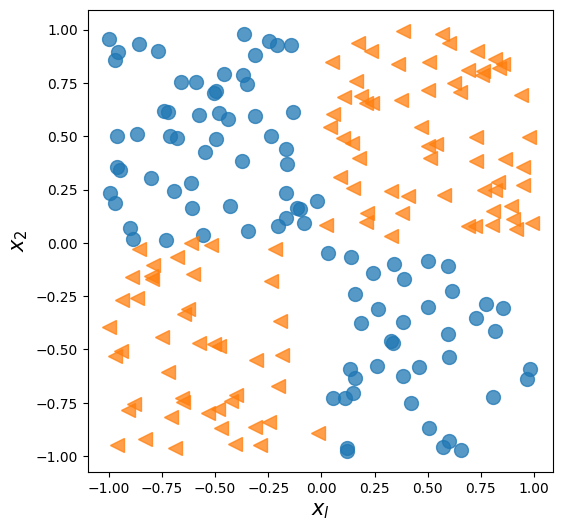

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y= np.ones (len (x))
y[x[:, 0] * x[:, 1]<0] = 0
x_train = x [ :100, : ]
y_train = y[ :100]
x_valid=x[100:, :]
y_valid = y[100:]
fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0],
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0],
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_l$', size=15)
plt.ylabel(r'$x_2$', size=15)


Чем больше слоев и чем больше нейронов в слое тем больше емкость.
Емкость - мера того насколько легко модель может апроксимировать сложные функции. На практике полезно начинать с простой модели

In [31]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1,#обычная логистическая регрессия
                                input_shape=(2,),
                                activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_3888\1852944948.py:17: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid,y=y_valid.astype(np.integer),


20000/20000 [==============================] - 24s 1ms/step


Text(0, 0.5, '$x_2$')

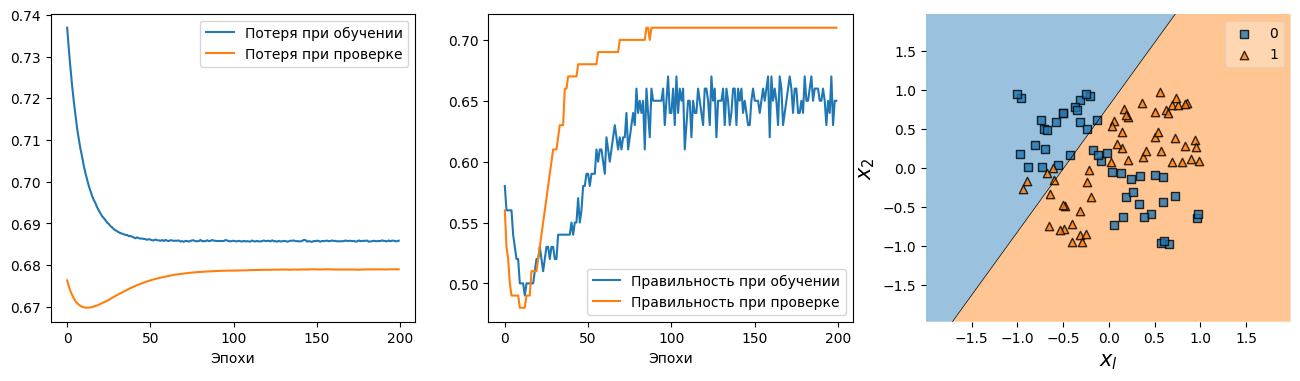

In [33]:
from mlxtend.plotting import plot_decision_regions
history = hist.history
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['Потеря при обучении', 'Потеря при проверке'])
ax.set_xlabel('Эпохи')

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'])
plt.plot(history['val_binary_accuracy'])
plt.legend(['Правильность при обучении', 'Правильность при проверке'])
ax.set_xlabel('Эпохи')

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid,y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_l$', size=15)
ax.set_ylabel(r'$x_2$', size=15)


Решение проблемы - добавление либо скрытых слоев(глебже) либо нейронов в скрытый слой(шире)
"+" глубокой - при той же емкости меньше параметров "-" широкой
"-" глубокой - предрасположенность к исчезновению/взрывному росту градиентов -> обучение труднее "+" широкой

In [34]:
tf.random.set_seed(1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4,
                                input_shape=(2,),
                                activation='relu'))
model.add(tf.keras.layers.Dense(units=4,
                                activation='relu'))
model.add(tf.keras.layers.Dense(units=4,
                                activation='relu'))
model.add(tf.keras.layers.Dense(units=1,
                                activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4)                 12        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

   45/20000 [..............................] - ETA: 29s  

C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_3888\1874660947.py:16: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid,y=y_valid.astype(np.integer),


20000/20000 [==============================] - 20s 1ms/step


Text(0, 0.5, '$x_2$')

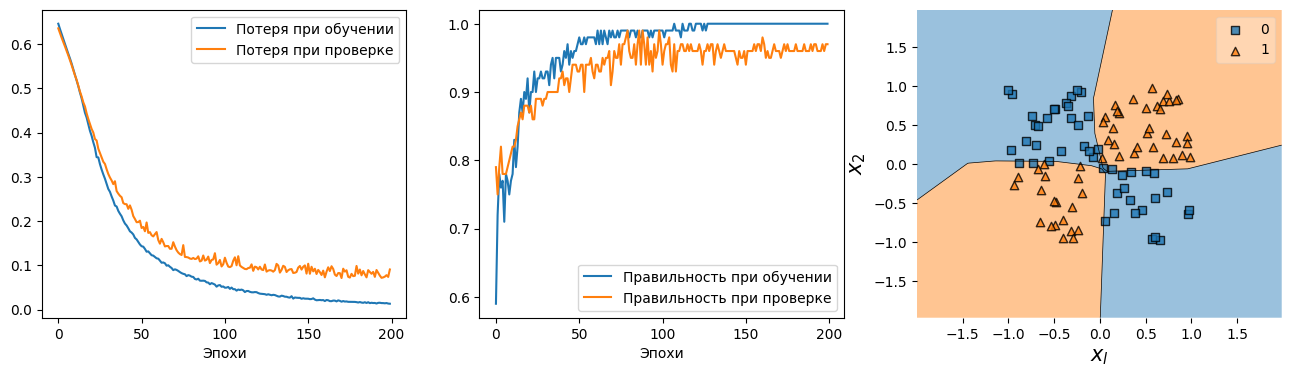

In [36]:
history = hist.history
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['Потеря при обучении', 'Потеря при проверке'])
ax.set_xlabel('Эпохи')

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'])
plt.plot(history['val_binary_accuracy'])
plt.legend(['Правильность при обучении', 'Правильность при проверке'])
ax.set_xlabel('Эпохи')

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid,y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_l$', size=15)
ax.set_ylabel(r'$x_2$', size=15)


In [37]:
#использование функционального api интерфейса keras
tf.random.set_seed(1)
inputs = tf.keras.Input(shape=(2,))#входной слой
#скрытые слои
h1 = tf.keras.layers.Dense(units=4, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(units=4, activation='relu')(h1)
h3 = tf.keras.layers.Dense(units=4, activation='relu')(h2)
#выход
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 12        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

In [39]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.hidden_1 = tf.keras.layers.Dense(
            units=4, activation='relu')
        self.hidden_2 = tf.keras.layers.Dense(
            units=4, activation='relu')
        self.hidden_3 = tf.keras.layers.Dense(
            units=4, activation='relu')
        self.output_layer = tf.keras.layers.Dense(
            units=1, activation='sigmoid')
        
    def call(self, inputs):
        h = self.hidden_1(inputs)
        h = self.hidden_2(h)
        h = self.hidden_3(h)
        return self.output_layer(h)

In [40]:
tf.random.set_seed(1)

model = MyModel()
model.build(input_shape=(None, 2))
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            multiple                  12        
                                                                 
 dense_14 (Dense)            multiple                  20        
                                                                 
 dense_15 (Dense)            multiple                  20        
                                                                 
 dense_16 (Dense)            multiple                  5         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

In [42]:
#кастомный слой с шумом
class NoisyLinear(tf.keras.layers.Layer):
    def __init__(self, output_dim, noise_stddev=0.1, **kwargs):
        self.output_dim = output_dim
        self.noise_stddev = noise_stddev
        super(NoisyLinear, self).__init__(**kwargs)

    def build(self, input_shape):
        self.w = self.add_weight(name='weights',
                                 shape=(input_shape[1],
                                        self.output_dim),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.output_dim),
                                 initializer='zeros',
                                 trainable=True)
        
    def call(self, inputs, training=False):#trainig - исполльзуется ли слой при обучении
        if training:
            batch = tf.shape(inputs)[0]
            dim = tf.shape(inputs)[1]
            noise = tf.random.normal(shape=(batch, dim),
                                     mean=0.0,
                                     stddev=self.noise_stddev)
            noisy_inputs = tf.add(inputs, noise)
        else:
            noisy_inputs = inputs
        z = tf.matmul(noisy_inputs, self.w) + self.b
        return tf.keras.activations.relu(z)
    
    def get_config(self):
        config = super(NoisyLinear, self).get_config()
        config.update({'output_dim':self.output_dim,
                       'noise_stddev':self.noise_stddev})
        return config

In [43]:
tf.random.set_seed(1)
noisy_layer = NoisyLinear(4)
noisy_layer.build(input_shape=(None, 4))
x = tf.zeros(shape=(1, 4))
tf.print(noisy_layer(x, training=True))

[[0.00590838771 0 0 0]]


In [44]:
config = noisy_layer.get_config()
new_layer = NoisyLinear.from_config(config)
x = tf.zeros(shape=(1, 4))
tf.print(new_layer(x, training=True))

[[0.00245057093 0 0.00920913648 0]]


In [45]:
tf.random.set_seed(1)
model = tf.keras.Sequential([
    NoisyLinear(4, noise_stddev=0.1),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.build(input_shape=(None, 2))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 noisy_linear_1 (NoisyLinea  (None, 4)                 12        
 r)                                                              
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_3888\1874660947.py:16: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid,y=y_valid.astype(np.integer),


20000/20000 [==============================] - 29s 1ms/step


Text(0, 0.5, '$x_2$')

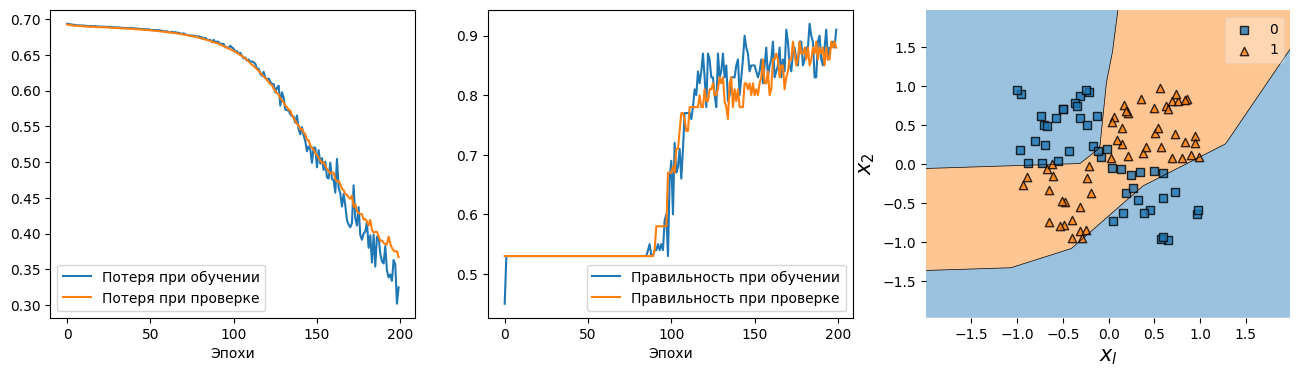

In [47]:
history = hist.history
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['Потеря при обучении', 'Потеря при проверке'])
ax.set_xlabel('Эпохи')

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'])
plt.plot(history['val_binary_accuracy'])
plt.legend(['Правильность при обучении', 'Правильность при проверке'])
ax.set_xlabel('Эпохи')

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid,y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_l$', size=15)
ax.set_ylabel(r'$x_2$', size=15)


In [48]:
import pandas as pd
dataset_path = tf.keras.utils.get_file(
    'auto-mpg.data',
    ('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'))

In [49]:
column_names = [
    'MPG', 'Cylinders', 'Displacement',
    'Horsepower', 'Weight', 'Acceleration',
    'ModelYear', 'Origin'
]
df = pd.read_csv(dataset_path, names=column_names, na_values='?',
                 comment='\t', sep = ' ', skipinitialspace=True)

In [50]:
df.to_csv('auto-mpg.csv')

In [51]:
import pandas as pd
df = pd.read_csv('auto-mpg.csv')

In [52]:
df = df.dropna()
df = df.reset_index(drop=True)
df = df.drop('Unnamed: 0', axis=1)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [53]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.8)
train_stats = df_train.describe().transpose()

In [54]:
numeric_column_names = [
    'Cylinders', 'Displacement',
    'Horsepower', 'Weight', 'Acceleration',
    ]
df_train_norm, df_test_norm = df_train.copy(), df_test.copy()


In [55]:
for col_name in numeric_column_names:
    mean = train_stats.loc[col_name, 'mean']
    std = train_stats.loc[col_name, 'std']
    df_train_norm.loc[:, col_name] = (df_train_norm.loc[:, col_name] - mean) / std
    df_test_norm.loc[:, col_name] = (df_test_norm.loc[:, col_name] - mean) / std



In [56]:
import tensorflow as tf
numeric_features = []
for col_name in numeric_column_names:
    numeric_features.append(tf.feature_column.numeric_column(key=col_name))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [57]:
feature_year = tf.feature_column.numeric_column(key='ModelYear')
bucketized_features = [] #добавляем в списки только для того, чтобы потом соединить их в один
bucketized_features.append(tf.feature_column.bucketized_column(source_column=feature_year,
                                                               boundaries=[73, 76, 79]))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [58]:
feature_origin = tf.feature_column.categorical_column_with_vocabulary_list(
    key='Origin',
    vocabulary_list=[1, 2, 3]
)
#после этого необходимо сделать из этого "плотный признак"
#можно использовать embedding_column и indicator_column
categorical_indicator_features = []
categorical_indicator_features.append(tf.feature_column.indicator_column(feature_origin))



Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


Работа с готовыми оценщиками: 
1) Определить входную функцию для загрузки данных
2) проебразовать набор данных в столбцы признаков
3) создать объект оценщика
4) использовать train(), evaluate(), predict()

In [59]:
def train_input_fn(df_train, batch_size=8):
    df = df_train.copy()
    print(df)
    train_x, train_y = df, df.pop('MPG')
    dataset = tf.data.Dataset.from_tensor_slices(
        (dict(train_x), train_y)
    )
    return dataset.shuffle(1000).repeat().batch(batch_size)

In [60]:
ds = train_input_fn(df_train_norm)
batch = next(iter(ds))
print(batch[1])

      MPG  Cylinders  Displacement  Horsepower    Weight  Acceleration  \
242  43.1  -0.836182     -0.983655   -1.486817 -1.167434      2.146909   
59   20.0  -0.836182     -0.495377   -0.348255 -0.654012      1.412020   
75   18.0  -0.836182     -0.680922    0.248135 -0.016787     -0.425203   
369  36.0  -0.836182     -0.837172   -0.781993 -1.173503     -0.131247   
210  16.5   1.532370      1.555393    2.091521  1.739527     -1.307069   
..    ...        ...           ...         ...       ...           ...   
299  34.2  -0.836182     -0.837172   -0.890427 -0.906475     -0.902880   
283  17.0   1.532370      1.115943    0.736090  1.084095     -0.094503   
211  13.0   1.532370      1.555393    1.142719  1.345054     -1.343814   
176  23.0  -0.836182     -0.690688   -0.402472  0.012343      0.493409   
199  18.5   0.348094      0.578836    0.193918  0.847412      0.199453   

     ModelYear  Origin  
242         78       2  
59          72       1  
75          72       2  
369        

In [61]:
def eval_input_fn(df_train, batch_size=8):
    df = df_train.copy()
    train_x, train_y = df, df.pop('MPG')
    dataset = tf.data.Dataset.from_tensor_slices(
        (dict(train_x), train_y)
    )
    return dataset.batch(batch_size)

all_feature_columns = numeric_features + bucketized_features + categorical_indicator_features

In [65]:
regressor = tf.estimator.DNNRegressor(feature_columns=all_feature_columns,
                                      hidden_units=[32, 10],#2 cлоя - в 1 32 нейрона, во втором 10
                                      model_dir='models')#директория для сохранения

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/models', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [63]:
import numpy as np
EPOCHS = 1000
BATCH_SIZE = 8
total_steps = EPOCHS * int(np.ceil(len(df_train) / BATCH_SIZE))
print(total_steps)

40000


In [66]:
regressor.train(input_fn=lambda:train_input_fn(df_train_norm, batch_size=BATCH_SIZE),
                steps=total_steps)

      MPG  Cylinders  Displacement  Horsepower    Weight  Acceleration  \
242  43.1  -0.836182     -0.983655   -1.486817 -1.167434      2.146909   
59   20.0  -0.836182     -0.495377   -0.348255 -0.654012      1.412020   
75   18.0  -0.836182     -0.680922    0.248135 -0.016787     -0.425203   
369  36.0  -0.836182     -0.837172   -0.781993 -1.173503     -0.131247   
210  16.5   1.532370      1.555393    2.091521  1.739527     -1.307069   
..    ...        ...           ...         ...       ...           ...   
299  34.2  -0.836182     -0.837172   -0.890427 -0.906475     -0.902880   
283  17.0   1.532370      1.115943    0.736090  1.084095     -0.094503   
211  13.0   1.532370      1.555393    1.142719  1.345054     -1.343814   
176  23.0  -0.836182     -0.690688   -0.402472  0.012343      0.493409   
199  18.5   0.348094      0.578836    0.193918  0.847412      0.199453   

     ModelYear  Origin  
242         78       2  
59          72       1  
75          72       2  
369        

PermissionDeniedError: Graph execution error:

Detected at node 'save/SaveV2' defined at (most recent call last):
    File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
    File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1053, in launch_instance
    File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 737, in start
    File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start
    File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 603, in run_forever
    File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1909, in _run_once
    File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
    File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 524, in dispatch_queue
    File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 513, in process_one
    File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 418, in dispatch_shell
    File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 758, in execute_request
    File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 426, in do_execute
    File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
    File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3046, in run_cell
    File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3101, in _run_cell
    File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
    File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3306, in run_cell_async
    File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3488, in run_ast_nodes
    File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3548, in run_code
    File "C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_3888\508675143.py", line 1, in <module>
    File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 360, in train
    File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1188, in _train_model
    File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1219, in _train_model_default
    File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1514, in _train_with_estimator_spec
Node: 'save/SaveV2'
Failed to create a directory: /; Permission denied
	 [[{{node save/SaveV2}}]]

Original stack trace for 'save/SaveV2':
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
  File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
  File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1053, in launch_instance
  File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 737, in start
  File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 603, in run_forever
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1909, in _run_once
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
  File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 524, in dispatch_queue
  File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 513, in process_one
  File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 418, in dispatch_shell
  File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 758, in execute_request
  File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 426, in do_execute
  File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
  File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3046, in run_cell
  File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3101, in _run_cell
  File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
  File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3306, in run_cell_async
  File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3488, in run_ast_nodes
  File "C:\Users\VIKTOR\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3548, in run_code
  File "C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_3888\508675143.py", line 1, in <module>
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 360, in train
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1188, in _train_model
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1219, in _train_model_default
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_estimator\python\estimator\estimator.py", line 1514, in _train_with_estimator_spec
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\training\monitored_session.py", line 606, in MonitoredTrainingSession
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\training\monitored_session.py", line 1050, in __init__
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\training\monitored_session.py", line 753, in __init__
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\training\monitored_session.py", line 1259, in __init__
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\training\monitored_session.py", line 1264, in _create_session
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\training\monitored_session.py", line 906, in create_session
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\training\monitored_session.py", line 664, in create_session
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\training\monitored_session.py", line 237, in finalize
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\training\saver.py", line 946, in build
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\training\saver.py", line 974, in _build
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\training\saver.py", line 535, in _build_internal
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\training\saver.py", line 324, in _AddShardedSaveOps
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\training\saver.py", line 298, in _AddShardedSaveOpsForV2
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\training\saver.py", line 230, in _AddSaveOps
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\training\saver.py", line 145, in save_op
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1734, in save_v2
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 796, in _apply_op_helper
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\framework\ops.py", line 2652, in _create_op_internal
  File "c:\Users\VIKTOR\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\framework\ops.py", line 1160, in from_node_def


In [ ]:
boosted_tree = tf.estimator.(
    feature_colums = all_feature_columns,
    n_batch_per_layer=20,
    n_trees=200
)

AttributeError: module 'tensorflow_estimator.python.estimator.api._v2.estimator' has no attribute 'BoostedTreesRegressor'